Combine with Economic/ demographic data if possible
Demographic Data: Incorporating demographic data such as income levels, education levels, employment rates, and population density by neighborhood or area can provide insights into how these factors correlate with crime rates and types of crime.
Economic Data: Economic indicators like unemployment rates, poverty rates, and housing prices can be correlated with crime rates. Analyzing these factors alongside crime data can help identify socioeconomic factors that may contribute to criminal activity.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Loading data in chunks
df = pd.read_csv('../data/Crime_Data_from_2020_to_Present.csv')
df.drop(['DR_NO', 'Date Rptd', 'AREA', 'Rpt Dist No', 'Weapon Used Cd', 'Status', 'Part 1-2', 'Premis Cd', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'] , axis=1, inplace=True)


C:\Users\neere\AppData\Local\Temp\ipykernel_18016\1718182548.py:8: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  graph = ox.graph_from_bbox(north, south, east, west, network_type="all")


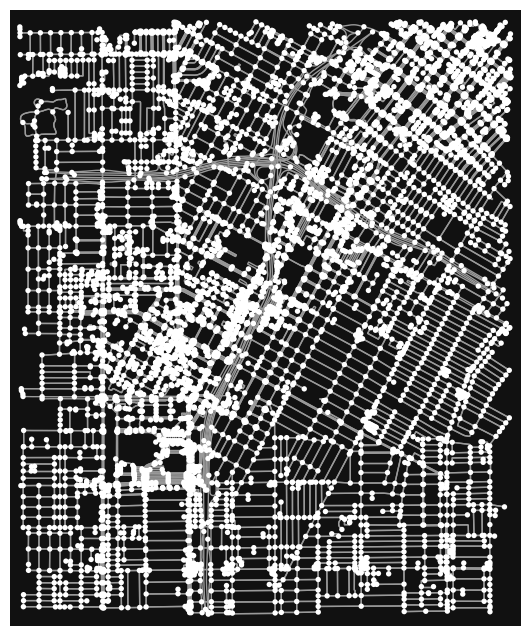

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import osmnx as ox

# Define a smaller location for quicker download (in this case, a bounding box around a city center)
north, south, east, west = 34.05, 34.0, -118.25, -118.3  # Define coordinates for a bounding box around downtown LA
place_name = "Los Angeles, California, USA"

# Fetch the street network for the specified bounding box
graph = ox.graph_from_bbox(north, south, east, west, network_type="all")

# Plot the street network
ox.plot_graph(graph)


In [2]:
uv = df['AREA NAME'].unique()
uv

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Hollenbeck', 'Topanga', 'Northeast',
       '77th Street', 'Pacific', 'N Hollywood', 'Harbor', 'Foothill',
       'Devonshire'], dtype=object)

In [3]:
from datetime import time
# Function to convert integer (times) to datetime
def int_to_time(integer):
    # Assuming integer represents time in HHMM format
    hour = integer // 100
    minute = integer % 100
    return time(hour, minute)

In [4]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
df['TIME OCC'] = df['TIME OCC'].apply(int_to_time)

In [5]:
df['DATETIME OCC'] = df['DATE OCC'] + pd.to_timedelta(df['TIME OCC'].astype(str))

df.set_index('DATETIME OCC', inplace = True)
df.drop(columns=['DATE OCC', 'TIME OCC'], inplace=True)

In [6]:
df_sorted = df.sort_index()

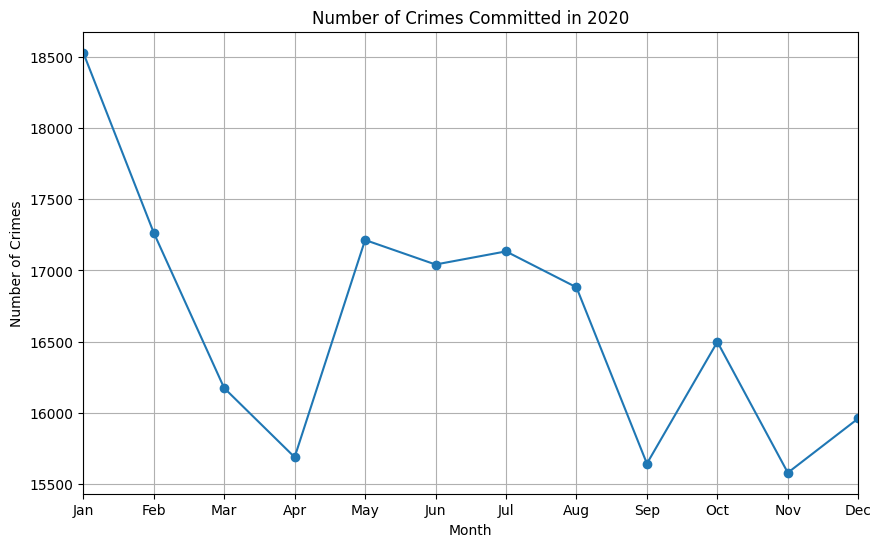

In [7]:
# Filter data for the year 2020
df_2020 = df[df.index.year == 2020]

# Group by month and count occurrences
monthly_counts = df_2020.groupby(pd.Grouper(freq='ME')).size()

# Plot the line chart
monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Number of Crimes Committed in 2020')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(monthly_counts.index, [month.strftime('%b') for month in monthly_counts.index])
plt.show()


In [8]:
crime_code_freq = df['Crm Cd Desc'].value_counts()

# Step 2: Select the top 10 most frequent crime code descriptions
top_10_crime_codes = crime_code_freq.head(10).index.tolist()
top_10_crime_codes

['VEHICLE - STOLEN',
 'BATTERY - SIMPLE ASSAULT',
 'THEFT OF IDENTITY',
 'BURGLARY FROM VEHICLE',
 'BURGLARY',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)']

In [9]:
df_filtered = df[df['Crm Cd Desc'].isin(top_10_crime_codes)]
df_filtered = df_filtered[['AREA NAME', 'Crm Cd Desc']]

In [10]:
# Apply one-hot encoding to 'Area Name' and 'Crm Cd Desc' columns

df_encoded = pd.get_dummies(df_filtered, columns=['AREA NAME', 'Crm Cd Desc'])

# Compute the correlation matrix
corr = df_encoded.corr()


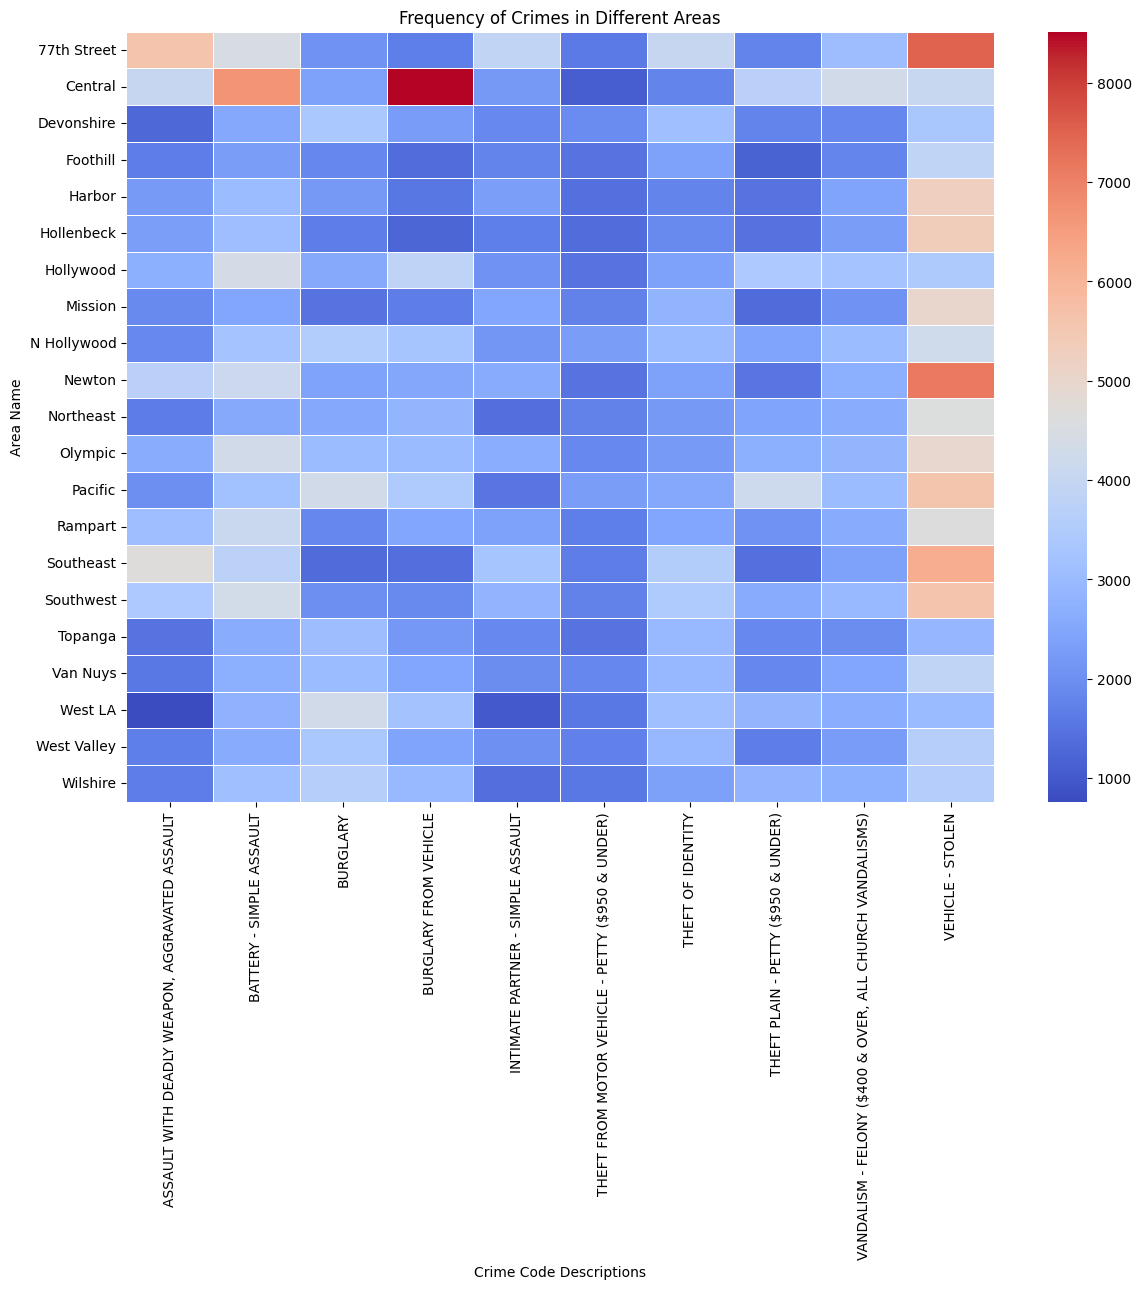

In [11]:
# Pivot the DataFrame to get counts of each crime in each area
pivot_df = df_filtered.pivot_table(index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, cmap='coolwarm', linewidths=.5)
plt.title('Frequency of Crimes in Different Areas')
plt.xlabel('Crime Code Descriptions')
plt.ylabel('Area Name')
plt.show()


In [ ]:


# fig = px.density_mapbox(df, lat='LAT', lon='LON', radius=8, z=np.ones(len(df)),
#                         center = dict(lat = 34.0522, lon=-118.2437), 
#                         zoom = 6, 
#                         mapbox_style = 'carto-positron')
# fig.show()

In [22]:
crime_counts

,AREA NAME,crime_count,crime_density
0,77th Street,6180,1.0
1,Central,6945,1.0
2,Devonshire,4090,1.0
3,Foothill,3337,1.0
4,Harbor,4230,1.0
5,Hollenbeck,3759,1.0
6,Hollywood,5206,1.0
7,Mission,3983,1.0
8,N Hollywood,4931,1.0
9,Newton,5008,1.0


In [ ]:

# # Sample 100,000 random instances from the DataFrame
# sample_df = df.sample(n=min(100000, len(df)))

# # Group the crimes by 'AREA NAME' and count the occurrences
# crime_counts = sample_df.groupby('AREA NAME').size().reset_index(name='crime_count')

# # Normalize crime counts by the area's size to get crime density
# area_sizes = sample_df['AREA NAME'].value_counts()
# crime_counts['crime_density'] = crime_counts['crime_count'] / crime_counts['AREA NAME'].map(area_sizes)

# # Merge with original DataFrame to get LAT and LON columns
# crime_counts = crime_counts.merge(sample_df[['AREA NAME', 'LAT', 'LON']].drop_duplicates(), on='AREA NAME')

# # Create a density mapbox plot using 'LAT' and 'LON' columns
# fig = px.density_mapbox(crime_counts, lat='LAT', lon='LON', z='crime_density', radius=8, zoom=10,
#                         mapbox_style="carto-positron")
# fig.show()


In [34]:
import plotly.graph_objects as go

# Coordinates of Los Angeles
la_lat = 34.0522
la_lon = -118.2437

# Create a layout with map style 'carto-positron'
fig = go.Figure(go.Scattermapbox())

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_zoom=9,  # Adjust zoom level
    mapbox_center={"lat": la_lat, "lon": la_lon},
    width=800,  # Adjust width of the figure
    height=600,  # Adjust height of the figure
)

fig.show()


In [37]:
df.head()

,AREA NAME,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,LOCATION,LAT,LON
DATETIME OCC,,,,,,,,,,,,,,,
2020-03-01 21:30:00,Wilshire,510,VEHICLE - STOLEN,NaN,0,M,O,STREET,NaN,Adult Arrest,510.0,998.0,1900 S LONGWOOD AV,34.0375,-118.3506
2020-02-08 18:00:00,Central,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,330.0,998.0,1000 S FLOWER ST,34.0444,-118.2628
2020-11-04 17:00:00,Southwest,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,480.0,NaN,1400 W 37TH ST,34.0210,-118.3002
2020-03-10 20:37:00,Van Nuys,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,NaN,Invest Cont,343.0,NaN,14000 RIVERSIDE DR,34.1576,-118.4387
2020-08-17 12:00:00,Hollywood,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,NaN,Invest Cont,354.0,NaN,1900 TRANSIENT,34.0944,-118.3277


In [ ]:
# df = pd.read_csv('../data/Crime_Data_from_2020_to_Present.csv', chunksize=10**5)
# for i, chunk in enumerate(df):
#         # Extract the first row of the chunk
#         print(chunk.iloc[0])